In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [2]:
dataset = MNIST(root='data/', download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FA8EA5354D0>, 5)

Label: 5


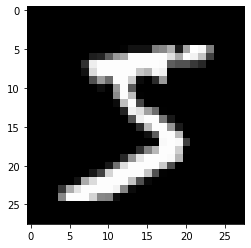

In [6]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [7]:
import torchvision.transforms as transforms

In [8]:
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [9]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [10]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


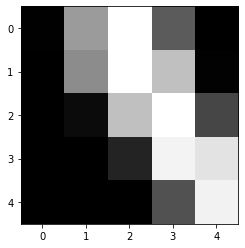

In [11]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [12]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [13]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [14]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [15]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0112,  0.0087,  0.0098,  ...,  0.0185, -0.0151,  0.0180],
        [ 0.0074, -0.0036,  0.0267,  ..., -0.0050,  0.0172,  0.0338],
        [-0.0300, -0.0030, -0.0160,  ..., -0.0095, -0.0216, -0.0043],
        ...,
        [ 0.0283, -0.0111, -0.0119,  ..., -0.0134, -0.0179,  0.0240],
        [ 0.0219, -0.0142, -0.0175,  ..., -0.0319, -0.0356,  0.0241],
        [-0.0058, -0.0212, -0.0236,  ..., -0.0339, -0.0240, -0.0157]],
       requires_grad=True)

In [16]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0227,  0.0245,  0.0176,  0.0202, -0.0047,  0.0352,  0.0276,  0.0119,
         0.0206, -0.0313], requires_grad=True)

In [17]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [18]:
for images, labels in train_loader:
    print(labels.shape)
    print(images.shape)
    outputs = model(images)
    break

torch.Size([128])
torch.Size([128, 1, 28, 28])


In [19]:
import torch.nn.functional as F
probs = F.softmax(outputs,dim=1)
print("Sample probabilities:\n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1174, 0.0916, 0.0807, 0.1170, 0.1107, 0.0979, 0.0947, 0.0807, 0.1153,
         0.0940],
        [0.0973, 0.1019, 0.0682, 0.0869, 0.0727, 0.1327, 0.1293, 0.1009, 0.1175,
         0.0928]])
Sum:  0.9999998807907104


In [20]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 5, 8, 5, 8, 0, 8, 8, 8, 8, 6, 3, 1, 1, 1, 6, 1, 5, 8, 1, 8, 1, 1, 1,
        7, 8, 5, 5, 8, 1, 1, 8, 3, 8, 5, 4, 6, 5, 8, 8, 1, 1, 8, 5, 8, 6, 6, 5,
        0, 0, 6, 8, 6, 0, 8, 1, 5, 8, 1, 1, 1, 8, 8, 0, 8, 6, 3, 6, 5, 1, 1, 1,
        6, 3, 3, 6, 8, 8, 0, 1, 6, 6, 1, 5, 8, 8, 5, 1, 5, 1, 8, 1, 1, 3, 1, 1,
        8, 1, 8, 1, 8, 6, 1, 6, 6, 1, 1, 0, 5, 8, 0, 5, 3, 6, 1, 1, 1, 8, 6, 1,
        5, 8, 0, 1, 8, 1, 8, 0])
tensor([0.1174, 0.1327, 0.1352, 0.1344, 0.1517, 0.1266, 0.1252, 0.1336, 0.1339,
        0.1431, 0.1271, 0.1375, 0.1248, 0.1404, 0.1277, 0.1335, 0.1427, 0.1301,
        0.1300, 0.1355, 0.1386, 0.1152, 0.1130, 0.1299, 0.1196, 0.1135, 0.1276,
        0.1379, 0.1394, 0.1309, 0.1369, 0.1344, 0.1231, 0.1323, 0.1235, 0.1404,
        0.1264, 0.1292, 0.1325, 0.1431, 0.1340, 0.1345, 0.1513, 0.1439, 0.1448,
        0.1199, 0.1143, 0.1172, 0.1166, 0.1135, 0.1464, 0.1227, 0.1334, 0.1162,
        0.1366, 0.1293, 0.1240, 0.1336, 0.1338, 0.1416, 0.1312, 0.1196, 0.1224,
       

In [21]:
labels

tensor([6, 5, 7, 8, 8, 6, 9, 7, 3, 2, 3, 2, 1, 4, 3, 3, 1, 0, 0, 8, 0, 1, 1, 9,
        4, 1, 2, 6, 0, 1, 2, 9, 9, 6, 6, 4, 4, 6, 2, 0, 2, 1, 7, 0, 4, 5, 1, 3,
        9, 9, 8, 4, 0, 1, 2, 1, 3, 3, 1, 1, 1, 4, 6, 9, 9, 9, 2, 9, 4, 0, 2, 1,
        5, 9, 6, 9, 8, 3, 6, 0, 9, 8, 8, 0, 3, 7, 0, 1, 0, 8, 8, 1, 7, 6, 7, 1,
        7, 1, 8, 1, 3, 5, 6, 5, 5, 7, 2, 4, 0, 7, 4, 7, 0, 4, 1, 4, 2, 7, 8, 2,
        0, 6, 9, 2, 8, 1, 5, 6])

In [22]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [23]:
accuracy(outputs, labels)

tensor(0.1953)

In [24]:
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2902, grad_fn=<NllLossBackward>)


In [25]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [26]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [27]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3106846809387207, 'val_acc': 0.07426819950342178}

In [28]:
history1 = fit(5, 0.001, model, train_loader, val_loader)
history2 = fit(5, 0.001, model, train_loader, val_loader)
history3 = fit(5, 0.001, model, train_loader, val_loader)
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9431, val_acc: 0.6322
Epoch [1], val_loss: 1.6721, val_acc: 0.7353
Epoch [2], val_loss: 1.4696, val_acc: 0.7714
Epoch [3], val_loss: 1.3170, val_acc: 0.7900
Epoch [4], val_loss: 1.1998, val_acc: 0.8022
Epoch [0], val_loss: 1.1080, val_acc: 0.8133
Epoch [1], val_loss: 1.0346, val_acc: 0.8186
Epoch [2], val_loss: 0.9747, val_acc: 0.8234
Epoch [3], val_loss: 0.9250, val_acc: 0.8292
Epoch [4], val_loss: 0.8830, val_acc: 0.8324
Epoch [0], val_loss: 0.8472, val_acc: 0.8356
Epoch [1], val_loss: 0.8162, val_acc: 0.8385
Epoch [2], val_loss: 0.7891, val_acc: 0.8416
Epoch [3], val_loss: 0.7653, val_acc: 0.8431
Epoch [4], val_loss: 0.7440, val_acc: 0.8446
Epoch [0], val_loss: 0.7250, val_acc: 0.8456
Epoch [1], val_loss: 0.7079, val_acc: 0.8474
Epoch [2], val_loss: 0.6923, val_acc: 0.8484
Epoch [3], val_loss: 0.6782, val_acc: 0.8491
Epoch [4], val_loss: 0.6652, val_acc: 0.8500


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

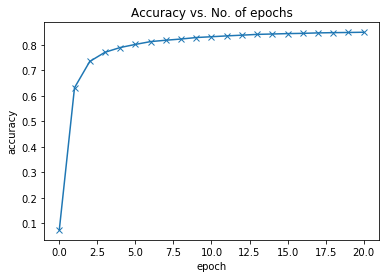

In [29]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [30]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


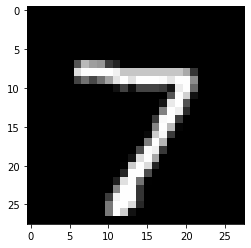

In [31]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [32]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [33]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


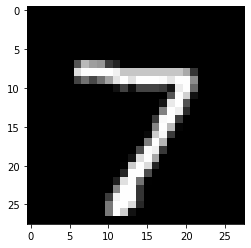

In [34]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [35]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6391070485115051, 'val_acc': 0.8617187738418579}

In [36]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [37]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0300, -0.0240, -0.0106,  ..., -0.0009, -0.0133, -0.0097],
                      [-0.0035, -0.0158, -0.0117,  ..., -0.0082, -0.0326, -0.0054],
                      [-0.0089, -0.0298, -0.0132,  ...,  0.0152, -0.0121, -0.0273],
                      ...,
                      [ 0.0291, -0.0257, -0.0153,  ..., -0.0029,  0.0240,  0.0208],
                      [ 0.0188,  0.0260,  0.0349,  ...,  0.0155,  0.0219, -0.0309],
                      [-0.0186,  0.0336, -0.0194,  ..., -0.0164,  0.0131,  0.0342]])),
             ('linear.bias',
              tensor([-0.0438,  0.0904, -0.0118,  0.0096,  0.0085,  0.0168, -0.0148,  0.0304,
                      -0.0816, -0.0399]))])

In [38]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6391070485115051, 'val_acc': 0.8617187738418579}